In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
%matplotlib inline

In [2]:
# Import listings.csv and load it as pandas dataframe
listings = pd.read_csv("listings.csv")

In [3]:
# Print out the head of the listings data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,8521,https://www.airbnb.com/rooms/8521,20210130031937,2021-01-30,SunsplashedSerenity walk to Harvard & Fresh Pond,"An elegant, sun-splashed, 2 bedroom (+2offices...",Huron Village is known for its charm. We have...,https://a0.muscache.com/pictures/30536/072e0a5...,306681,https://www.airbnb.com/users/show/306681,...,10.0,10.0,9.0,C0121120491,t,2,2,0,0,0.26
1,11169,https://www.airbnb.com/rooms/11169,20210130031937,2021-01-31,"Lovely Studio Room: Thu-Mons, Near Universities",Large sunny room which comfortably fits a coup...,The neighborhood is quiet and friendly and our...,https://a0.muscache.com/pictures/75383179/7e2a...,40965,https://www.airbnb.com/users/show/40965,...,10.0,10.0,10.0,NaN,f,3,0,3,0,1.10
2,11945,https://www.airbnb.com/rooms/11945,20210130031937,2021-01-31,Near Harvard: Safe & Lovely Room,Room next to kitchen and living room in wonder...,Amazing neighborhood: Quiet yet close walk to ...,https://a0.muscache.com/pictures/88bf993e-1956...,40965,https://www.airbnb.com/users/show/40965,...,10.0,10.0,10.0,NaN,f,3,0,3,0,0.25
3,19581,https://www.airbnb.com/rooms/19581,20210130031937,2021-01-31,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/188f1b4b-f37b...,74249,https://www.airbnb.com/users/show/74249,...,10.0,10.0,8.0,NaN,f,3,0,3,0,0.05
4,22006,https://www.airbnb.com/rooms/22006,20210130031937,2021-01-31,B & B near Harvard's Quad Houses,Your choice (depending on availability) of one...,"We're in a beautiful neighborhood, with nearby...",https://a0.muscache.com/pictures/10277743/5814...,84280,https://www.airbnb.com/users/show/84280,...,10.0,10.0,10.0,STR-13676,f,1,0,1,0,0.81


In [4]:
# List out all the columns in the listings
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [5]:
# Using regex to remove unwanted characters and convet into float
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

In [6]:
# Convert columns into their proper formats (date-time)
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [7]:
# Group the data by the column 'host_since'
result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

In [8]:
# rename the 'id' column to listings
year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

In [9]:
# Create a column with cummulative sum of the listings by year
year['total listings']= year['listings'].cumsum(axis=0)

In [10]:
# Convert the data type of the column 'host_since' to int
year['host_since'] = year['host_since'].astype(int)

In [11]:
# Remnaming the column 'Host_Since' to 'year'
year.rename(columns={'host_since':'year'}, inplace=True)

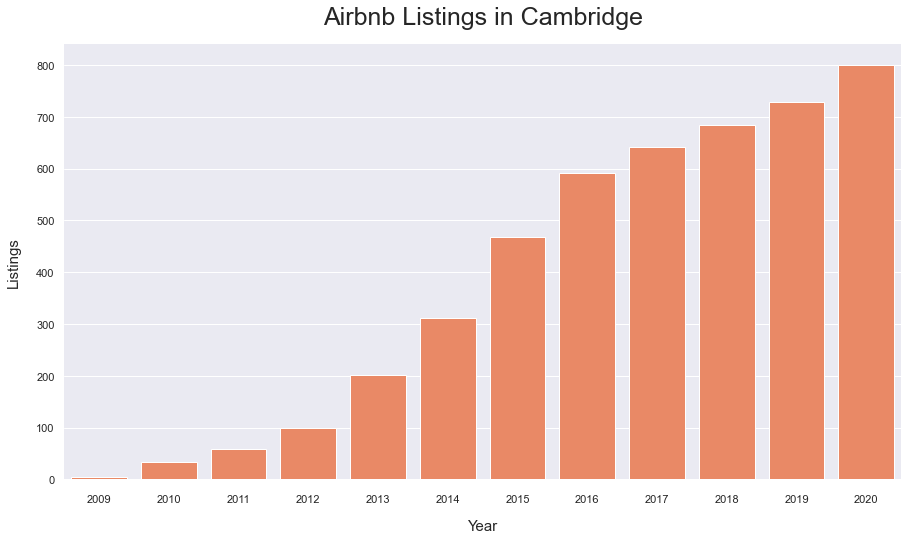

In [12]:
#Cambridge,MA Airbnb listings over time
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Barplot for 'year' and 'total_listings'
ax = sns.barplot(x="year", y="total listings", data=year, color='Coral')
# Title
ax.set_title('Airbnb Listings in Cambridge',fontsize=25,pad=20)
# X and Y lables
ax.set_xlabel('Year',fontsize=15, labelpad=15)
ax.set_ylabel('Listings',fontsize=15, labelpad=15) 
sns.despine(offset=5, left=True)

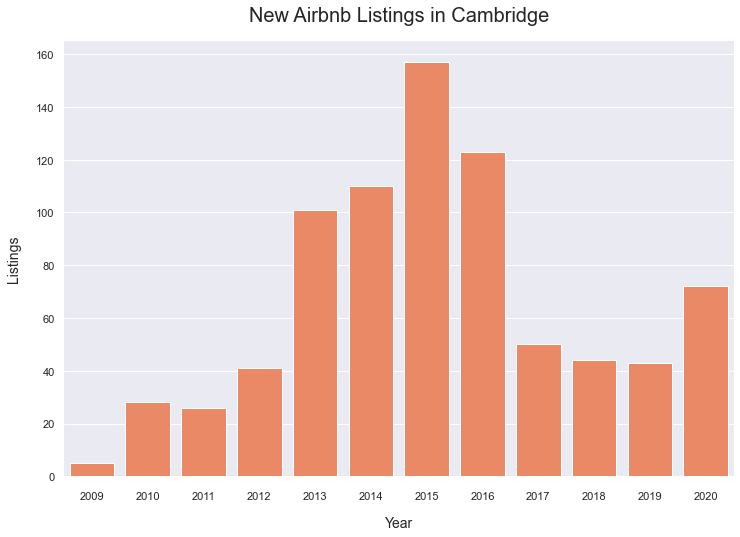

In [13]:
#New Airbnb Listings in Cambridge, MA
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Barplot for 'year' and 'listings'
ax = sns.barplot(x='year', y="listings", data=year, color="coral")
# Title
ax.set_title('New Airbnb Listings in Cambridge',fontsize=20,pad=20)
# X and Y lables
ax.set_xlabel('Year',fontsize=14, labelpad=15)
ax.set_ylabel('Listings',fontsize=14, labelpad=15)
sns.despine(offset=5, left=True)

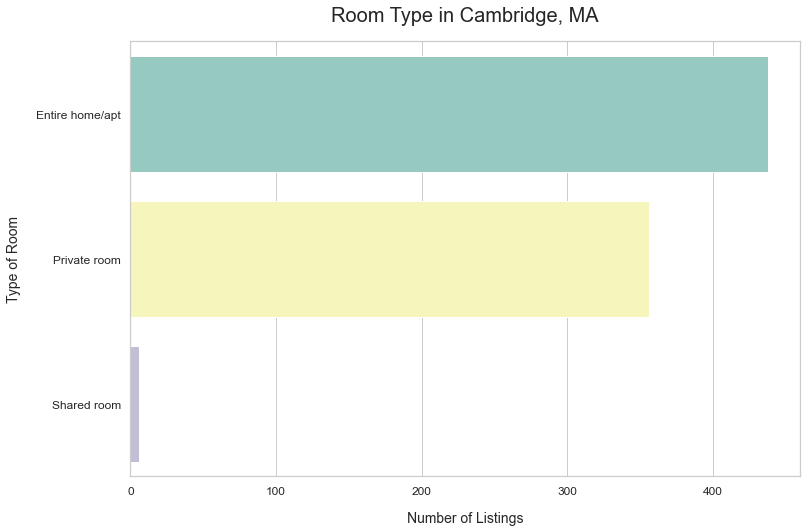

In [14]:
#Room Type in Cambridge, MA
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# Title
ax.axes.set_title("Room Type in Cambridge, MA",fontsize=20, pad=20)
# Countplot for 'room_type' and their count
ax = sns.countplot(y='room_type',data=listings,order=listings['room_type'].value_counts().index, palette="Set3")
# X and Y Lables
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
# changing tick size
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

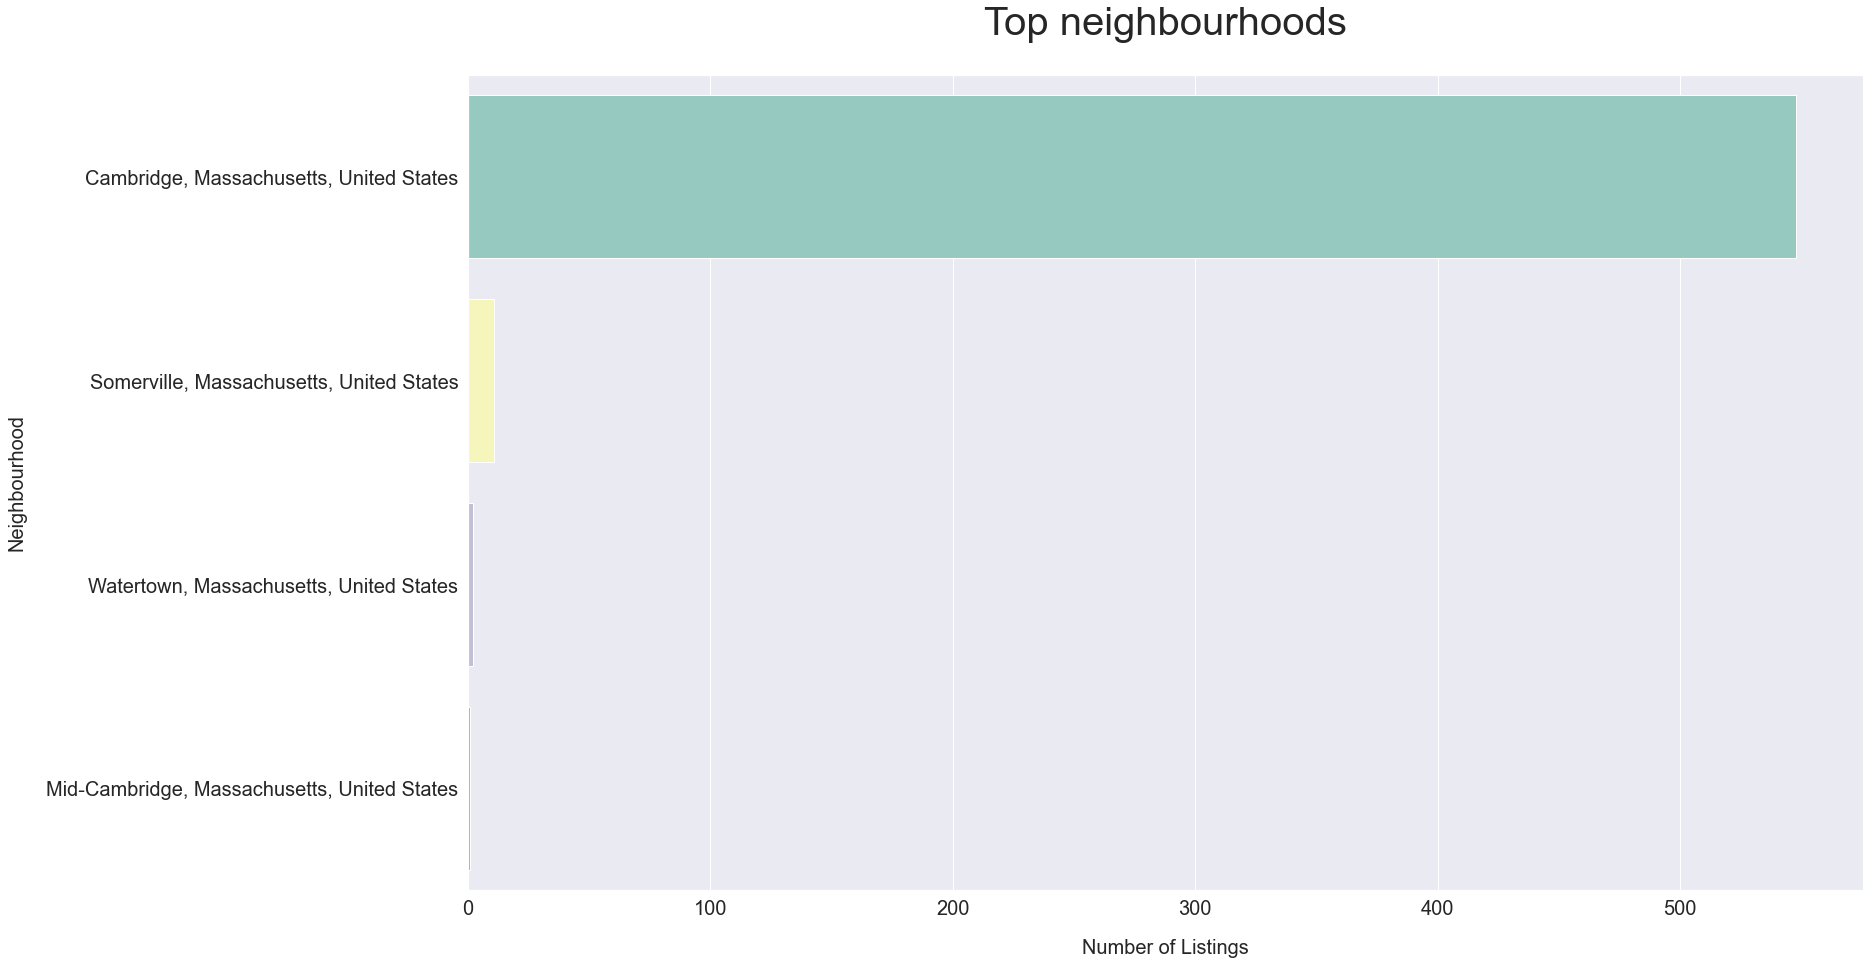

In [15]:
#Top neighbourhoods
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Top neighbourhoods",fontsize=40,pad=40)
# Countplot for 'neighbourhood' and their count
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
# X and Y labels
ax.set_xlabel('Number of Listings',fontsize=20,labelpad=20)
ax.set_ylabel('Neighbourhood',fontsize=20,labelpad=20)
# Changing tick size
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [16]:
#load the data of availablity per listing_id by date and its price
calendar = pd.read_csv("calendar.csv")
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,8521,2021-01-30,f,$150.00,$150.00,3.0,1125.0
1,8521,2021-01-31,f,$150.00,$150.00,3.0,1125.0
2,8521,2021-02-01,f,$150.00,$150.00,3.0,1125.0
3,8521,2021-02-02,f,$150.00,$150.00,3.0,1125.0
4,8521,2021-02-03,f,$150.00,$150.00,3.0,1125.0
5,8521,2021-02-04,f,$150.00,$150.00,3.0,1125.0
6,8521,2021-02-05,f,$150.00,$150.00,3.0,1125.0
7,8521,2021-02-06,f,$150.00,$150.00,3.0,1125.0
8,8521,2021-02-07,f,$150.00,$150.00,3.0,1125.0
9,8521,2021-02-08,f,$150.00,$150.00,3.0,1125.0


In [17]:
#Print columns information and its data calendar
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292031 entries, 0 to 292030
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      292031 non-null  int64  
 1   date            292031 non-null  object 
 2   available       292031 non-null  object 
 3   price           292031 non-null  object 
 4   adjusted_price  292031 non-null  object 
 5   minimum_nights  292000 non-null  float64
 6   maximum_nights  292000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.6+ MB


In [18]:
#Remove $ sign on the price column and convert to numeric value
calendar['price'] =calendar['price'].apply(lambda x: str(x).replace('$',''))
calendar['price'] = pd.to_numeric(calendar['price'], errors = 'coerce')
df_calendar = calendar.groupby('date')[["price"]].sum()
df_calendar['mean'] = calendar.groupby('date')[["price"]].mean()
df_calendar.columns = ['Total Price', 'Avg Price']
df_calendar.head(10)

,Total Price,Avg Price
date,,
2021-01-30,87529.0,142.787928
2021-01-31,105616.0,132.185232
2021-02-01,106598.0,133.414268
2021-02-02,106816.0,133.687109
2021-02-03,106708.0,133.551940
2021-02-04,106669.0,133.503129
2021-02-05,108449.0,135.730914
2021-02-06,108726.0,136.077597
2021-02-07,106797.0,133.663329


In [19]:
#Set date as index
df_calendar2 = calendar.set_index("date")
df_calendar2.index = pd.to_datetime(df_calendar2.index)
df_calendar2 = df_calendar2[['price']].resample('M').mean()
df_calendar2.head(10)

,price
date,
2021-01-31,136.788244
2021-02-28,135.266002
2021-03-31,149.640680
2021-04-30,152.898748
2021-05-31,157.407389
2021-06-30,161.039365
2021-07-31,161.240006
2021-08-31,159.261173
2021-09-30,158.875344


In [20]:
#Summary statistics
print(df_calendar2.describe())

            price
count   13.000000
mean   153.392710
std      8.431244
min    135.266002
25%    152.898748
50%    155.841844
75%    158.875344
max    161.240006


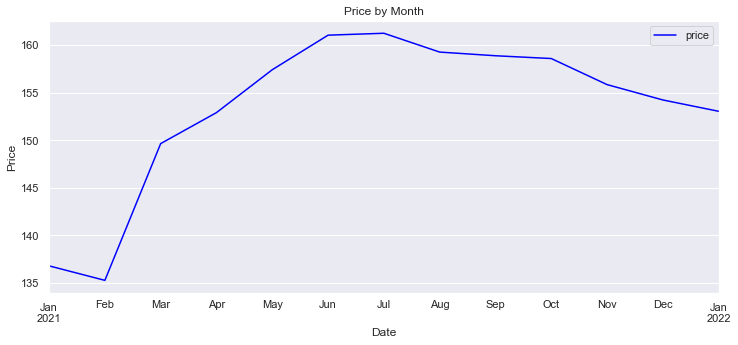

In [21]:
# Price by Month Line Chart
ax=df_calendar2.plot(figsize=(12,5), color='blue')
ax.set_title('Price by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
plt.show()